# TAHAPAN ANALISIS SENTIMEN

# IMPORT LIBRARY

In [1]:
import tweepy
import csv
import pandas as pd
import numpy as np
import nltk
import string, re
import matplotlib.pyplot as plt
import nltk.corpus

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# CRAWLING

In [2]:
api_key = 'uFxPSn5gz9QV7f4UvDUJdoau4'
api_key_secret = 'mlL0WvJduvCDjoRIsWpVKEyMt4UIBwkJZpluSTSr4EgNCmLOJK'
access_token = '248547968-Twueyyp8YV3xnuW3MswfffPSpFfv6kh84aNwP6V2'
access_token_secret = '1QwCESO23yZUd955FTlR91RL1VCt1ESaGeuSQzJk2MooP'

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
search_key = 'IKN baru'


In [3]:
csvFile = open('crawling_'+search_key+'.csv', 'a+', newline='', encoding='utf-8')
csvWriter = csv.writer(csvFile)
u = []
c = []
t = []

for tweet in tweepy.Cursor(api.search_tweets, q=search_key+' -filter:retweets',
                           tweet_mode='extended', lang='id', count=420).items(420):
    print(tweet.user.name, tweet.created_at, tweet.full_text)
    u.append(tweet.user.name)
    c.append(tweet.created_at)
    t.append(tweet.full_text.encode("utf-8"))
    csvWriter.writerow([tweet.user.name, tweet.created_at, tweet.full_text])

Faishal Dwiputra 2022-05-16 12:45:38+00:00 pertimbangan lainnya itu pada risiko efek migrasi ke ikn. seandainya mobilisasi terpusat disana (misal karena dijadikan sentra ukm), mungkin bisa menambah masalah sosial baru disana (kemiskinan, gelandangan pengemis, dsb). pemerintah perlu bantu ini dari kebijakan penataan umkm.
😷 Boemi Poetera Stoikis 😷 2022-05-16 10:52:30+00:00 @elleanor12 @txtdrbuih Maksudnya buat istana baru di IKN?
Thanosi Mucondo 2022-05-16 10:26:27+00:00 @papa_loren Ngeri utang Negara ini.. 

Ud dr 2019 bom waktu ny.. 
Dimana hutang baru cm buat bayar hutang.. 

Sama skali gak ada kemampuan buat bayar..negara ini.. 

Disisi lain Infrastruktur yg diharapkan bs mendatangkan investasi, kenyataanny ambyar..

Plus maksain bangun IKN?
eka sanjaya 2022-05-16 10:13:29+00:00 Pemerintah Tengah Merancang Sistem Pertahanan dan Keamanan Baru di Kaltim 

#IbukotaNegara
#IKN
#SemangatNusantara https://t.co/GXEbQu90VI
ahmad qizwini 2022-05-16 09:06:03+00:00 @AronChooy @ihwanbudiawan @d

H. P Wahyunanto 2022-05-14 12:17:56+00:00 ini harus diteruskan oleh Pelanjut Jokowi :

Kawasan industri energi hijau (green energy), hilirisasi minerba, 10 Bali baru, kemandirian pangan (food estate), poros maritim dunia,  ibukota nusantara (IKN), produksi bensin sendiri, pertumbuhan ekonomi di daerah-daerah,
🇮🇩 Donny A. Wiguna 🇮🇩 2022-05-14 11:41:10+00:00 14. Kebutuhan kita adalah produktivitas. Sejauh ini, ada UU Cipta Lapangan Kerja, ada pembangunan IKN, semua meningkatkan produktivitas

Indonesia punya area amat sangat luas utk dibangun, utk jadi pusat pertumbuhan baru

Kita bisa punya pertumbuhan ekonomi tinggi jangka panjang
Zigen Bgl 2022-05-14 11:19:34+00:00 @keuangannews_id Kemaren lemhanas lagi di mana..? Kok baru sekarang sadar bahwa lokasi IKN berada di radius jangkauan rudal hipersonik...?
One Pinch Man 2022-05-14 11:01:26+00:00 @beyondllll @whateverythinks @schfess Setau sy, setidaknya ITB sudah punya rencana buat cabang baru di IKN. Yg lain barang kali juga pada punya.
B

Ayu Sari 2022-05-13 02:36:06+00:00 Forum dewan adat Tabi, dukung pemekaran Provinsi baru Papua, IKN Rajut NKRI https://t.co/058IlJlNlX
DetikFinance 2022-05-13 02:35:31+00:00 Sederet sarana dan prasarana transportasi bakal dibangun di ibu kota negara (IKN) baru. Ada jaringan kereta api, koridor busway dan jalan tol. https://t.co/ElqzHibX3F
Bunga Lily 2022-05-13 02:31:56+00:00 Forum dewan adat Tabi, dukung pemekaran Provinsi baru Papua, IKN Rajut NKRI https://t.co/AuZ84BdiAg
maunx Lugay76 2022-05-13 02:30:06+00:00 @maspiyuaja tidurnya kelamaan bangun bangun udah jadi undang undang, di sahkan Januari sekarang baru ngeh ada ikn hadahhh, sare deuih we hudang deuih geus jadi ibu kota baru, yang kemarin galaknya amazing kemana ya?
detikcom 2022-05-13 02:23:45+00:00 Sederet sarana dan prasarana transportasi bakal dibangun di ibu kota negara (IKN) baru. Ada jaringan kereta api, koridor busway dan jalan tol. https://t.co/eCbKAJY0lL
Siskarr 2022-05-13 02:22:47+00:00 Tokoh Pemuda Papua di Papua Nu

denny seputro 2022-05-12 01:54:13+00:00 @msaid_didu gak usah dipikir mbah. Pean blm tentu lihat IKN yg baru kok.
SultanTua 2022-05-12 01:45:25+00:00 Harapan Masyarakat Dengan Penetapan Nusantara Sebagai Nama Ibu kota Baru Dan Pengesahan UU IKN Akan Membawa Kemajuan Dan Kesejahteraan Bangsa Indonesia https://t.co/pskjCsQLHW
SultanLangkat 2022-05-12 01:42:24+00:00 Harapan Masyarakat Dengan Penetapan Nusantara Sebagai Nama Ibu kota Baru Dan Pengesahan UU IKN Akan Membawa Kemajuan Dan Kesejahteraan Bangsa Indonesia https://t.co/aXvEJR7Kot
🚀 2022-05-12 01:34:24+00:00 @e100ss Cari legitimasi ga mau dipindah ke IKN Baru iki. Pancet ngono ya IKN nya ga usah aja sekalian. Aneh banget.
Rizal92 2022-05-12 01:18:07+00:00 Harapan Masyarakat Dengan Penetapan Nusantara Sebagai Nama Ibu kota Baru Dan Pengesahan UU IKN Akan Membawa Kemajuan Dan Kesejahteraan Bangsa Indonesia https://t.co/SDQxavkABx
Salsa Maulidya 2022-05-12 01:15:10+00:00 Harapan Masyarakat Dengan Penetapan Nusantara Sebagai Nama Ibu k

Pak Ferdi 2022-05-11 02:36:04+00:00 Potensi Pembangunan IKN, Waskita Beton Precast Target Kontrak Baru Tumbuh 30 Persen
Indonesia Tampil Memimpin
https://t.co/Sp7ddpIEN7
Abah Afnan 2022-05-11 02:31:23+00:00 @johnhendrik3 @abu_waras Ya udah gw ngetwit soal hutang 7.000 trilyun " untuk bayar bunga hutang dari hutang baru."
Kok tega maksa bikin IKN dgn hutang.
Bekti Mulya 2022-05-11 02:31:14+00:00 @abangbelneg semoga ikn menjadi wajah baru indonesia
pengembara jalanan 2022-05-11 02:27:11+00:00 Ikn proyek utang baru dan menyengsarakan rakyat #IKNProyekUtangBaru #IKNProyekUtangBaru https://t.co/RJDHpwCxPZ
Ozilaprilia 🇲🇨 2022-05-11 02:24:03+00:00 Dampak positif IKN baru 

Indonesia Tampil Memimpin https://t.co/LLjhVIGh9I
Abah Afnan 2022-05-11 02:21:43+00:00 @Bomber_hashtag Kawasan ikn diidentikkan sebagai kerajaan baru, pola pikir out of the box penyelenggara negara.

#IKNProyekUtangBaru
EDWIN BASUKI 2022-05-11 02:11:49+00:00 @MardaniAliSera @PKSejahtera @korantempo Lah.. Ini kan pajak yg di

AnnaBänana🍌🍋🍏YellowAllTheWay💛💛💛💛💛 2022-05-09 13:24:46+00:00 @WSetyorini2 @PartaiSocmed Insight w Desi Answar Menanti wajah baru ikn nusantara
Aku cariin linknya bentar
Dariyah 2022-05-09 13:10:10+00:00 @KotaNusantara IKN Nusantara akan mejadi pertumbuhan ekonomi baru, Indonesia semakin maju............  #SemangatNusantara
kr1sd 2022-05-09 13:04:43+00:00 @lysavana1 @MyBagaspati @M45Broo_ Selama masih berstatus DKI itulah keistimewaan Jakarta... tapi nanti setelah Ibukota pindah ke IKN baru statusnya bakal berubah jd kota biasa tanpa keistimewaan itu. Walkot bakal dipilih lewat pilkada juga? rame beutt pasti... 🤔😁
AHSAN FURQAN IBRAHIM 2022-05-09 12:00:04+00:00 SIDANG PERDANA USTADZ EDY MULYADI, Sang Pembela Rakyat Kalimantan.
Pengadilan Negeri Jakarta Pusat, 10 Mei 2022.
Menolak IKN yang membebani rakyat dan hanya menguntungkan oligarki adalah aspirasi rakyat.

Rakyat tidak butuh IKN tapi menginginkan presiden baru. https://t.co/7pQ7VPw4jl
Jen 2022-05-09 11:27:16+00:00 @justlikeazu Dekat

In [3]:
df = pd.read_csv('crawling_'+search_key+'.csv', names=['username', 'tanggal', 'isi_tweet'], sep=',')
df

,username,tanggal,isi_tweet
0,wiedhodho,2021-12-29 01:07:11+00:00,Persiapan dibawa pindah ke IKN Baru https://t....
1,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...
2,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...
3,Jawa Pos,2021-12-28 13:46:33+00:00,Gubernur Kaltim Buka Sosialisasi Kota Cerdas K...
4,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...
...,...,...,...
2893,Capi Muslim Oposisi,2022-05-08 07:50:40+00:00,Kalau berita Menag minta izin dana haji untuk ...
2894,Putra Juanda,2022-05-08 07:42:48+00:00,@ElvinaNara IKN Nusantara Pertumbuhan Ekonomi ...
2895,Liputan6.com,2022-05-08 07:18:33+00:00,"6 Hoaks yang Beredar Sepekan, dari Uang Pecaha..."
2896,Rulie Maulana,2022-05-08 06:10:32+00:00,Sementara itu aset negara di Jakarta baru terc...


# LABELING

In [4]:
df = pd.read_csv('labeling IKN Baru.csv', sep=',')
df

,username,tanggal,isi_tweet,label
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0
...,...,...,...,...
415,miqbalnov,2021-12-23 23:22:59+00:00,@JazuliJuwaini Setuju tadz. Batalkan aja itu p...,0
416,Jacky F Alex,2022-01-19 04:40:17+00:00,@tjhinfar @DivHumas_Polri @ListyoSigitP @prabo...,0
417,Siful,2022-01-19 04:19:07+00:00,@Cengkonek2 @yedi_kurniahadi @CNNIndonesia Unt...,0
418,Gate@madina252017,2022-01-19 04:14:21+00:00,Partai Demokrat menerima IKN.Baru . Ambyar don...,0


In [5]:
df['label'].value_counts()

1    210
0    210
Name: label, dtype: int64

# PREPROCESSING

In [6]:
# CASE FOLDING
def cleansing(data):
    
    # lower text
    data = data.lower()

    # hapus mention
    data = ' '.join(re.sub('([@#]+[A-Za-z0-9]+)|([@_#]+[A-Za-z0-9]+)|(\w+:\/\/\S+)',' ', data).split())
                  
    # hapus hastag/#tagger
    data = re.sub(r'#([^\s]+)', ' ', data)
    
    # hapus html
    data = re.sub(r'http\S+', ' ', data)
    
    # hapus ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r' ', data)
         
    # hapus angka
    data = re.sub(r'\d+', ' ', data)
        
    # hapus single char
    data = re.sub(r'\b[a-zA-Z]\b', ' ', data)
    
    # hapus remove tab, new line, dan back slice
    data = data.replace('\\t',' ').replace('\\n',' ').replace('\\u',' ').replace('\\',' ')

    # hapus punctuation/tanda baca
    data = data.translate(str.maketrans(' ',' ', string.punctuation))

    return data

In [7]:
# jalankan cleansing data
df['case_folding'] = df['isi_tweet'].apply(cleansing)
df.head()

,username,tanggal,isi_tweet,label,case_folding
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1,zulkifli hasan sebut pemindahan ikn momentum p...
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1,gubernur kalimantan timur kaltim isran noor se...
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0,ni seriuskah nama ibukota baru indonesia ikn k...
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0,ancaman pertahanan di ibu kota baru ikn dekat ...
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0,saya mengerti kekhawatiran membangun ikn baru...


In [8]:
#Tahap Stopword
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['ad','ada','adalah','adanya','adapun','adlh','agak','agaknya','agar','akan','akankah','agr','ah','aj','aja',
                 'ajaa','aje','akhir','akhiri','akhirnya','aku','akulah','ama','amat','amatlah','amp','an','anda','andalah',
                 'andai','antar','antara','antaranya','apa','apaa','apaan','apaapa','apabila','apakah','apalagi','apatah',
                 'artinya','asal','asalkan','atas','atau','ataukah','ataupun','atw','awal','awalnya',
                 'bagai','bagaikan','bagaimana','bagaimanakah','bagaimanapun','bagi','bagian','bahkan','bahwa','bahwasanya',
                 'baik','baiknya','bakal','bakalan','balik','banyak','bapak','bawah','beberapa','begini','beginian',
                 'beginikah','beginilah','begitu','begitukah','begitulah','begitupun','bekerja','belakang','belakangan',
                 'belum','belumlah','benarkah','benarlah','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah',
                 'berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan','berikut','berikutnya',
                 'berjumlah','berkali','berkata','berkehendak','berkeinginan','berkenaan','berlainan','berlalu','berlangsung',
                 'berlebihan','bermacam','bermacam','bermaksud','bermula','bersama','bersama','bersiap','bertanya','berturut',
                 'bertutur','berujar','berupa','besar','betul','betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah',
                 'boleh','bolehkah','bolehlah','buat','bukan','bukankah','bukanlah','bukannya','bulan','bung','bbrp','bbrpa',
                 'bo','bro','brp','brarti','bs','btl','bu',
                 'cara','caranya','cc','cm','cukup','cukupkah','cukuplah','cuma',
                 'dah','dahulu','dahuluada','dalam','dan','dann','dapat','dari','darimana','daripada','datang','deh','dekat',
                 'demi','demikian','demikianlah','dengan','depan','dg','dgn','di','dia','dialah','diakhiri','diakhirinya',
                 'dialah','diantara','diantaranya','diberi','diberikan','diberikannya','dibuat','dibuatnya','didapat',
                 'didatangkan','digunakan','diibaratkan','diibaratkannya','diingat','diingatkan','diinginkan','dijawab',
                 'dijelaskan','dijelaskannya','dikarenakan','dikatakan','dikatakannya','dikerjakan','diketahui','diketahuinya',
                 'dikira','dilakukan','dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta',
                 'dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan','diperbua',
                 'diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan','diperlukannya','dipersoalkan',
                 'dipertanyakan','dipunyai','diri','dirinya','disampaikan','disebut','disebutkan','disebutkannya','disini',
                 'disinilah','ditambahkan','ditandaskan','ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk',
                 'ditunjuki','ditunjukkan','ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan',
                 'diucapkannya','diungkapkan','dl','dlu','dong','dpat','dpt','dr','dri','drimana','drimna','dripada','drpd',
                 'drpda','dua','dulu','duh','duuh','duuuh',
                 'eh','ehh','entar','entr','empat','enggak','enggaknya','entah','entahlah',
                 'gimana','gmana','gimna','gmna','gmn','gua','gue','guna','gunakan','gw','gwa','gwe',
                 'ha','hadap','hai','hal','halo','haloo','hallo','helo','hello','helloo','hampir','hanya','hanyalah','hari',
                 'harus','haruslah','harusnya','hendak','hendaklah','hendaknya','hingga',
                 'ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ii','ikut','ingat','ingin','inginkah','inginkan','ini',
                 'inikah','inilah','itu','itukah','itulah','iy','iya','iyaa','iyaa',
                 'jadi','jd','jdi','jadilah','jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban',
                 'jawabnya','jelas','jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumat','jumlah','jumlahnya',
                 'justru',
                 'kala','kalau','kalaulah','kalaupun','kali','kalian','kalo','kata','kau','klo','klau','klu','kami','kamilah',
                 'kamis','kamu','kamulah','kan','kann','kannn','kapan','kapankah','kapanpun','karena','karna','krna','krn',
                 'krena','karenanya','kasus','kata','katakan','katakanlah','katanya','kau','ko','ke','keadaan','kebetulan',
                 'kecil','kedua','keduanya','keinginan','kek','kelamaan','kelihatan','kelihatannya','kelima','keluar',
                 'kembali','kemudian','kemungkinan','kemungkinannya','kenapa','kepada','kepadanya','keq','koq','kesampaian',
                 'keseluruhan','keseluruhannya','keterlaluan','ketika','khususnya','kini','kinilah','kira','kiranya','kita',
                 'kitalah','km','kmu','kmuu','kmudian','knapa','knp','knpa','kok','kurang','kurangnya',
                 'lagi','lagia','lah','lh','lain','lainnya','lalu','lama','lamanya','lanjut','lanjutnya','lebih','lewat',
                 'lima','loh','lo','loe','lue','lu','luar',
                 'macam','maka','makanya','makin','malah','malahan','mampu','mampukah','mana','manakala','manalagi','masa',
                 'masalah','masalahnya','masih','masihkah','masing','mata','mau','maupun','melainkan','melakukan','melalui',
                 'melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat','memerlukan','memihak',
                 'meminta','memintakan','memisalkan','memperbuat','mempergunakan','memperkirakan','memperlihatkan',
                 'mempersiapkan','mempersoalkan','mempertanyakan','mempunyai','memulai','memungkinkan','menaiki',
                 'menambahkan','menandaskan','menanti','menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan',
                 'mendatang','mendatangi','mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya',
                 'mengenai','mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya',
                 'mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan','menjadi',
                 'menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya','menurut','menuturkan',
                 'menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh','menyiapkan','merasa','mereka',
                 'merekalah','merupakan','meski','meskipun','meyakini','meyakinkan','minggu','minta','mirip','misal','misalkan',
                 'misalnya','mreka','mrk','mrka','mula','mulai','mulailah','mulanya','mungkin','mungkinkah','mw',
                 'nah','nahh','naik','namun','nang','nanti','nantinya','ni','nih','nihh','nihhh','ntar','ntr','nya','nyaa',
                 'nek','neng','nnti','nanti','nyaris','nyatanya',
                 'oh','ohh','ohhh','ooh','olah','oleh','olehnya',
                 'pada','padahal','padanya','pak','paling','panjang','pantas','para','pasti','pastilah','penting',
                 'pentingnya','per','percuma','perlu','perlukah','perlunya','pernah','persoalan','pertama','pertanyaan',
                 'pertanyakan','pdhal','pdhl','pula','pun','pihak','pihaknya','pukul','pula','pun','punya',
                 'rabu','rasa','rasanya','rata','rupanya',
                 'saat','saatnya','sabtu','saja','sajalah','saling','sama','sama','sambil','sampai','sampaikan','sana',
                 'sangat','sangatlah','sapa','satu','saya','sayalah','sb','sbb','sbagai','sbgai','sbg','sbelum','sblum',
                 'sblm','sbelumnya','sblumnya','sblmnya','sbelumny','sblumny','sblmny','sdang','sdg','se','seandai',
                 'seandainya','sebab','sebabnya','sebagai','sebagaimana','sebagainya','sebagian','sebaik','sebaiknya',
                 'sebaliknya','sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar',
                 'sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang','sedangkan',
                 'sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera','seharusnya','sehingga',
                 'seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya','sekali','sekalian','sekaligus',
                 'sekalipun','sekarang','sekarang','sekecil','seketika','sekiranya','sekitar','sekitarnya','sekurang',
                 'sekurangnya','sela','selain','selaku','selalu','selama','selama','selamanya','selanjutnya','selasa','seluruh',
                 'seluruhnya','semacam','semakin','semampu','semampunya','semasa','semasih','semata','semaunya','sementara',
                 'semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian','sendirinya','senin','seolah',
                 'seorang','sepanjang','sepantasnya','sepantasnyalah','seperlunya','seperti','sepertinya','sepihak','sering',
                 'seringnya','serius','seriuskah','serta','serupa','sesaat','sesama','sesampai','sesegera','sesekali','seseorang','sesuatu',
                 'sesuatunya','sesudah','sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba',
                 'setibanya','setidak','setidaknya','setinggi','seusai','sewaktu','shingga','shg','si','siap','siapa',
                 'siapakah','siapapun','sini','sinilah','sn','sna','sni','soal','soalnya','spa','sprti','suatu','sudah',
                 'sudahkah','sudahlah','supaya','sya','sy',
                 'tadi','tadinya','tahu','tahun','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya',
                 'tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tengah','tentang',
                 'tentu','tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri',
                 'terhadap','terhadapnya','teringat','teringat','terjadi','terjadilah','terjadinya','terkira','terlalu',
                 'terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah','tertentu','tertuju',
                 'terus','terutama','tetap','tetapi','tiap','tiba','tidak','tidakkah','tidaklah','tidaknya','tiga',
                 'tinggi','tju','toh','tu','tuu','tuh','tuhh','tuhhh','tuju','tuk','tunjuk','turut','tutur','tuturnya',
                 'ucap','ucapnya','ujar','ujarnya','umum','umumnya','ungkap','ungkapnya','untuk','usah','usai','uwaw',
                 'waduh','wah','wahai','waktu','waktunya','walau','walaupun','waw','waaw','waww','wkk','wkwk','wkwkwk',
                 'wkwkwkchuakzz','wong',
                 'ya','yaa','yah','yahh','yaah','yaitu','yak','yakin','yakni','yan','yang','yng','ybs','ye','yg','yo',
                 'yok','yokk'
                ]

# merge stopword
data = stop_factory + more_stopword

dictionary = ArrayDictionary(data)
stopword = StopWordRemover(dictionary)

review = []
for index, row in df.iterrows():
    review.append(stopword.remove(row['case_folding']))
    
# jalankan proses stopword removal
df['stopword'] = review
df.head()

,username,tanggal,isi_tweet,label,case_folding,stopword
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1,zulkifli hasan sebut pemindahan ikn momentum p...,zulkifli hasan pemindahan ikn momentum pemerat...
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1,gubernur kalimantan timur kaltim isran noor se...,gubernur kalimantan timur kaltim isran noor re...
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0,ni seriuskah nama ibukota baru indonesia ikn k...,seriuskah nama ibukota baru indonesia ikn seri...
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0,ancaman pertahanan di ibu kota baru ikn dekat ...,ancaman pertahanan ibu kota baru ikn dgn malay...
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0,saya mengerti kekhawatiran membangun ikn baru...,mengerti kekhawatiran membangun ikn baru sang...


In [9]:
# Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# jalankan proses stemmer
review = []
for index, row in df.iterrows():
    review.append(stemmer.stem(row['stopword']))

df['stemming']=review
df.head()

,username,tanggal,isi_tweet,label,case_folding,stopword,stemming
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1,zulkifli hasan sebut pemindahan ikn momentum p...,zulkifli hasan pemindahan ikn momentum pemerat...,zulkifli hasan pindah ikn momentum perata bangun
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1,gubernur kalimantan timur kaltim isran noor se...,gubernur kalimantan timur kaltim isran noor re...,gubernur kalimantan timur kaltim isran noor re...
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0,ni seriuskah nama ibukota baru indonesia ikn k...,seriuskah nama ibukota baru indonesia ikn seri...,serius nama ibukota baru indonesia ikn serius ...
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0,ancaman pertahanan di ibu kota baru ikn dekat ...,ancaman pertahanan ibu kota baru ikn dgn malay...,ancam tahan ibu kota baru ikn dgn malaysia anc...
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0,saya mengerti kekhawatiran membangun ikn baru...,mengerti kekhawatiran membangun ikn baru sang...,erti khawatir bangun ikn baru sangat kompleks ...


In [10]:
#Tokenization
def token(data):
    return word_tokenize(data)
# jalankan proses tokenizing
review = []
for index, row in df.iterrows():
    review.append(token(row['stemming']))

df['token']=review
df.head()

,username,tanggal,isi_tweet,label,case_folding,stopword,stemming,token
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1,zulkifli hasan sebut pemindahan ikn momentum p...,zulkifli hasan pemindahan ikn momentum pemerat...,zulkifli hasan pindah ikn momentum perata bangun,"[zulkifli, hasan, pindah, ikn, momentum, perat..."
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1,gubernur kalimantan timur kaltim isran noor se...,gubernur kalimantan timur kaltim isran noor re...,gubernur kalimantan timur kaltim isran noor re...,"[gubernur, kalimantan, timur, kaltim, isran, n..."
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0,ni seriuskah nama ibukota baru indonesia ikn k...,seriuskah nama ibukota baru indonesia ikn seri...,serius nama ibukota baru indonesia ikn serius ...,"[serius, nama, ibukota, baru, indonesia, ikn, ..."
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0,ancaman pertahanan di ibu kota baru ikn dekat ...,ancaman pertahanan ibu kota baru ikn dgn malay...,ancam tahan ibu kota baru ikn dgn malaysia anc...,"[ancam, tahan, ibu, kota, baru, ikn, dgn, mala..."
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0,saya mengerti kekhawatiran membangun ikn baru...,mengerti kekhawatiran membangun ikn baru sang...,erti khawatir bangun ikn baru sangat kompleks ...,"[erti, khawatir, bangun, ikn, baru, sangat, ko..."


In [11]:
# Menyimpan data clean
df = df.to_csv('labeling IKN BARU CLEAN.csv',sep=',', index=False)
df_clean = pd.read_csv('labeling IKN BARU CLEAN.csv', sep=',')
df_clean

,username,tanggal,isi_tweet,label,case_folding,stopword,stemming,token
0,Jawa Pos,2021-12-28 22:10:50+00:00,Zulkifli Hasan Sebut Pemindahan IKN Momentum P...,1,zulkifli hasan sebut pemindahan ikn momentum p...,zulkifli hasan pemindahan ikn momentum pemerat...,zulkifli hasan pindah ikn momentum perata bangun,"['zulkifli', 'hasan', 'pindah', 'ikn', 'moment..."
1,VOI.id,2021-12-28 13:50:04+00:00,Gubernur Kalimantan Timur (Kaltim) Isran Noor ...,1,gubernur kalimantan timur kaltim isran noor se...,gubernur kalimantan timur kaltim isran noor re...,gubernur kalimantan timur kaltim isran noor re...,"['gubernur', 'kalimantan', 'timur', 'kaltim', ..."
2,"Kaka, S.Cov.",2021-12-28 13:37:00+00:00,Ni seriuskah nama ibukota baru indonesia IKN? ...,0,ni seriuskah nama ibukota baru indonesia ikn k...,seriuskah nama ibukota baru indonesia ikn seri...,serius nama ibukota baru indonesia ikn serius ...,"['serius', 'nama', 'ibukota', 'baru', 'indones..."
3,TheDreamIsReal,2021-12-28 13:29:37+00:00,Ancaman Pertahanan di Ibu Kota Baru (IKN). Dek...,0,ancaman pertahanan di ibu kota baru ikn dekat ...,ancaman pertahanan ibu kota baru ikn dgn malay...,ancam tahan ibu kota baru ikn dgn malaysia anc...,"['ancam', 'tahan', 'ibu', 'kota', 'baru', 'ikn..."
4,Rifqi Ar,2021-12-28 09:53:49+00:00,@PDemokrat Saya mengerti kekhawatiran @PDemokr...,0,saya mengerti kekhawatiran membangun ikn baru...,mengerti kekhawatiran membangun ikn baru sang...,erti khawatir bangun ikn baru sangat kompleks ...,"['erti', 'khawatir', 'bangun', 'ikn', 'baru', ..."
...,...,...,...,...,...,...,...,...
415,miqbalnov,2021-12-23 23:22:59+00:00,@JazuliJuwaini Setuju tadz. Batalkan aja itu p...,0,setuju tadz batalkan aja itu proyek ikn itu cu...,setuju tadz batalkan proyek ikn cuma kompensas...,tuju tadz batal proyek ikn cuma kompensasi rez...,"['tuju', 'tadz', 'batal', 'proyek', 'ikn', 'cu..."
416,Jacky F Alex,2022-01-19 04:40:17+00:00,@tjhinfar @DivHumas_Polri @ListyoSigitP @prabo...,0,pdhl yg invest besar an di ikn uea cina ga iku...,invest an ikn uea cina ga ikutan investlah rak...,invest an ikn uea cina ga ikut investlah rakya...,"['invest', 'an', 'ikn', 'uea', 'cina', 'ga', '..."
417,Siful,2022-01-19 04:19:07+00:00,@Cengkonek2 @yedi_kurniahadi @CNNIndonesia Unt...,0,untung partai yg gue dukung nolak ikn baru,untung partai gue dukung nolak ikn baru,untung partai gue dukung nolak ikn baru,"['untung', 'partai', 'gue', 'dukung', 'nolak',..."
418,Gate@madina252017,2022-01-19 04:14:21+00:00,Partai Demokrat menerima IKN.Baru . Ambyar don...,0,partai demokrat menerima iknbaru ambyar dong ...,partai demokrat menerima iknbaru ambyar polit...,partai demokrat terima iknbaru ambyar politis ...,"['partai', 'demokrat', 'terima', 'iknbaru', 'a..."


# SPLIT DATA

In [12]:
# Deklarasi Variabel
X = df_clean['token']
y = df_clean['label']

# Membagi data testing dan training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=30)

In [13]:
# Mengetahui data training terdapat pada indeks ke berapa
print(y_train)
df_yTrain = pd.DataFrame(data = y_train)
df_yTrain = df_yTrain.to_csv('y_train.csv',sep=',')

221    1
104    0
121    0
182    0
233    1
      ..
404    0
8      1
134    0
212    1
210    1
Name: label, Length: 294, dtype: int64


# EKSTRAKSI FITUR

In [14]:
# Vectorizer Object
tfidf = TfidfVectorizer()

# TF-IDF
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Get Feature Names
tfidfTokens = tfidf.get_feature_names()

In [15]:
# Menampilkan Nilai Vectorizer
df_tfidf = pd.DataFrame(data = X_train.toarray(),columns = tfidfTokens)

# Menyimpan data Vectorizer
df_tfidf = df_tfidf.to_csv('tfidfVec.csv',sep=',', index=False)

df_tfidf = pd.read_csv('tfidfVec.csv',sep=',')

In [16]:
# Menampilkan Nilai TF-IDF Vectorizer
df_tfidf

,abai,achmad,ada,adab,adalah,adat,adil,agr,ahkirnya,ahli,...,wni,wujud,ya,yaa,yang,yg,yok,york,yudhistira,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.151119,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [17]:
print(tfidfTokens)

['abai', 'achmad', 'ada', 'adab', 'adalah', 'adat', 'adil', 'agr', 'ahkirnya', 'ahli', 'ahmad', 'ahuk', 'air', 'aja', 'ajaa', 'ajar', 'aju', 'akal', 'akan', 'akibat', 'akmad', 'akses', 'aku', 'alam', 'alami', 'alas', 'alhamdulillah', 'alih', 'allah', 'amal', 'aman', 'amanat', 'amat', 'ambil', 'ambisi', 'ambisius', 'amdal', 'amdalnya', 'an', 'analisa', 'ancam', 'andal', 'anggap', 'anggar', 'anggota', 'antara', 'anti', 'antisipasi', 'antusias', 'apa', 'apaa', 'apaapa', 'apakah', 'apbd', 'apbn', 'api', 'arab', 'arti', 'aset', 'asing', 'asn', 'asnswasta', 'asyik', 'atas', 'atau', 'atlet', 'atrbpn', 'atu', 'ayo', 'babat', 'bagai', 'bagi', 'bagus', 'bahas', 'bahwa', 'baidowi', 'baik', 'bakar', 'balik', 'ballistic', 'bandara', 'banding', 'bang', 'bangga', 'bangkrut', 'bangun', 'banjiiiiir', 'banjir', 'banjirberarti', 'banjircalon', 'banjirinsya', 'banyak', 'bapak', 'bappenas', 'bara', 'baru', 'baruberapa', 'barubuat', 'baruindonesia', 'barutapi', 'batal', 'batas', 'batu', 'bawa', 'bayar', 'bb

In [18]:
nb = MultinomialNB().fit(X_train, y_train)

# Menentukan hasil prediksi dari x_test
pred = nb.predict(X_test)

# Menentukan probabilitas hasil prediksi
prob = nb.predict_proba(X_test)[:,1]

In [19]:
#print (y_test) sebagai label aktual
df_yTest = pd.DataFrame(data = y_test)
df_yTest

,label
398,0
204,1
321,0
374,0
54,1
...,...
260,1
40,1
38,1
335,0


In [20]:
#perbandingan label aktual dengan label prediksi
df_yTest['Prediksi']=pred
df_yTest = df_yTest.to_csv('y_testPred.csv',sep=',')
df_yTest = pd.read_csv('y_testPred.csv', sep=',')
df_yTest

,Unnamed: 0,label,Prediksi
0,398,0,1
1,204,1,1
2,321,0,0
3,374,0,1
4,54,1,1
...,...,...,...
121,260,1,1
122,40,1,1
123,38,1,1
124,335,0,0


In [21]:
#print(classification_report(y_test,y_predict))
print('MultinomialNB Accuracy : ', accuracy_score(y_test, pred))
print('MultinomialNB Precision : ', precision_score(y_test, pred))
print('MultinomialNB Recall : ', recall_score(y_test, pred))
print('MultinomialNB F1_Score : ', f1_score(y_test, pred))

print('===================================================')
print(classification_report(y_test, pred))
 
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

MultinomialNB Accuracy :  0.873015873015873
MultinomialNB Precision :  0.8405797101449275
MultinomialNB Recall :  0.9206349206349206
MultinomialNB F1_Score :  0.8787878787878787
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.84      0.92      0.88        63

    accuracy                           0.87       126
   macro avg       0.88      0.87      0.87       126
weighted avg       0.88      0.87      0.87       126

AUC: 0.9680020156210632


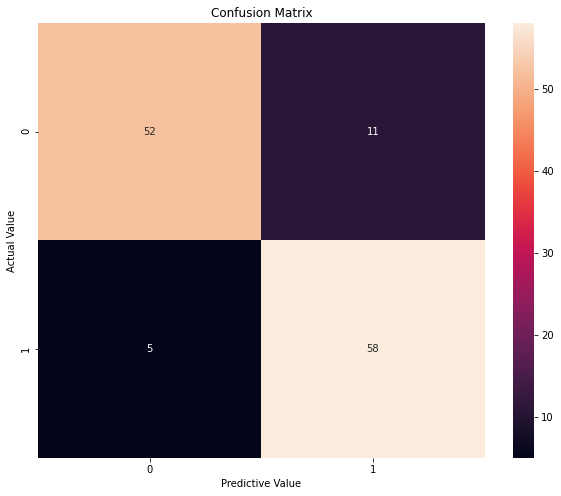

In [22]:
# Import package
import seaborn as sns

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predictive Value")
plt.ylabel("Actual Value")
plt.show()

<ipython-input-24-2898d949d57d>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(quantity, labels=labels, colors=colors, explode=expl, autopct='%1.1f%%', shadow=True, startangle=90)


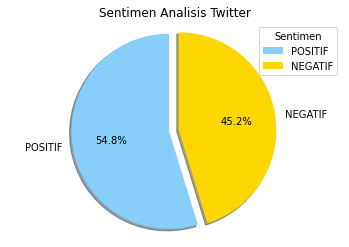

In [24]:
labels = ['POSITIF', 'NEGATIF']
quantity = [df_yTest['Prediksi'].value_counts()]
colors = ['lightskyblue', 'gold']
expl = (0, 0.1)

plt.title('Sentimen Analisis Twitter')
plt.pie(quantity, labels=labels, colors=colors, explode=expl, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.legend(title = 'Sentimen')
plt.show()